##### Forecast the Airlines Passengers data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [1]:
# Import Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading DataSet

df = pd.read_excel('Airlines+Data.xlsx')
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
# Checking for null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,96.0,213.708333,71.918216,104.0,156.0,200.0,264.75,413.0


In [5]:
df = df.drop_duplicates()
df.shape

(96, 2)

<AxesSubplot:>

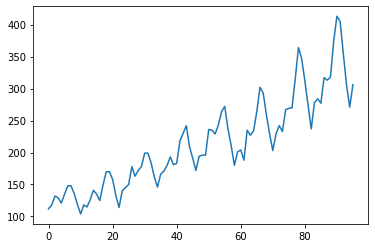

In [6]:
# Identifying past trends

df.Passengers.plot()

<AxesSubplot:ylabel='Density'>

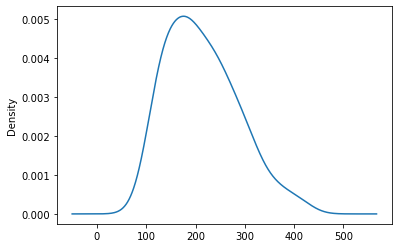

In [7]:
df.Passengers.plot(kind = 'kde')

<AxesSubplot:ylabel='Frequency'>

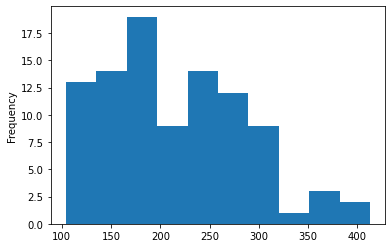

In [8]:
df.Passengers.plot(kind = 'hist')

In [9]:
a = pd.read_excel('Airlines+Data.xlsx', header = 0, index_col = 0, parse_dates = True, squeeze = True)

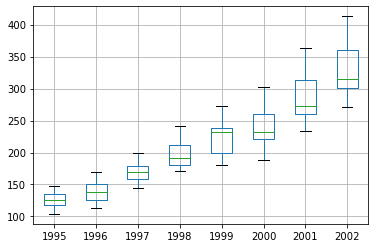

In [10]:
# BoxPlot

group = a.groupby(pd.Grouper(freq = 'A'))
years = pd.DataFrame()
for i, j in group:
    years[i.year] = j.values
years.boxplot()
plt.show()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

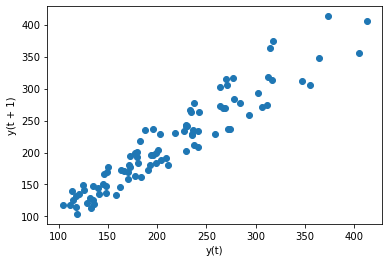

In [11]:
# LagPlot

lag_plot(a)

In [12]:
# Splitting Data

train = df.head(77)
test = df.tail(19)

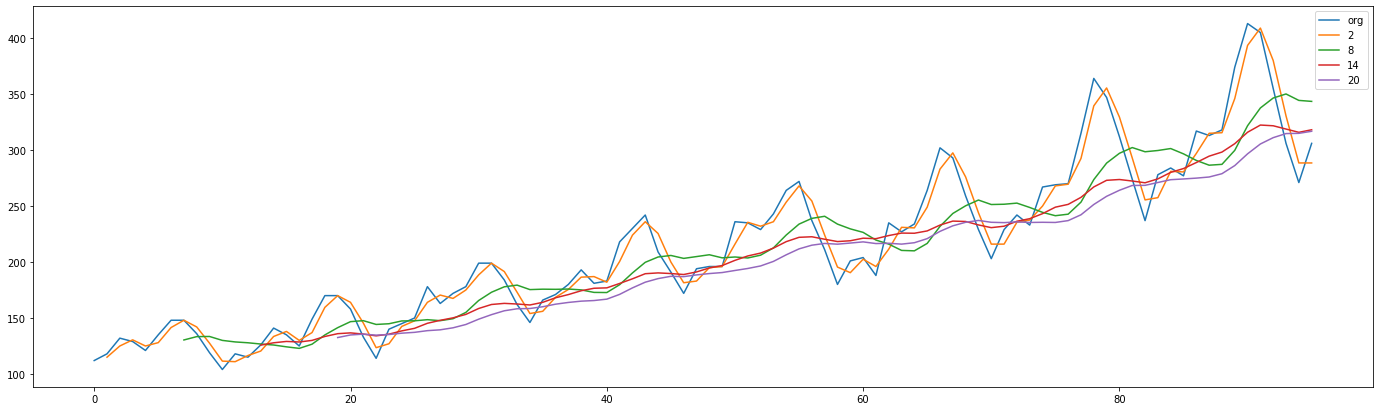

In [13]:
# Moving Average

plt.figure(figsize = (24, 7))
df.Passengers.plot(label = 'org')
for i in range(2, 24, 6):
    df.Passengers.rolling(i).mean().plot(label = str(i))
plt.legend(loc = 'best')

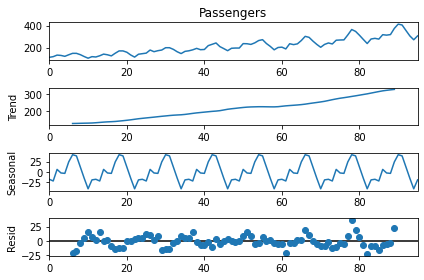

In [14]:
# Time series decomposition plot

decompose_ts_add = seasonal_decompose(df.Passengers, period = 12)
decompose_ts_add.plot()
plt.show()

A partial autocorrelation [PACF] is a summary of the relationship between an observation in a time series with observation at prior time stepa with the relationships of intervening observations removed.

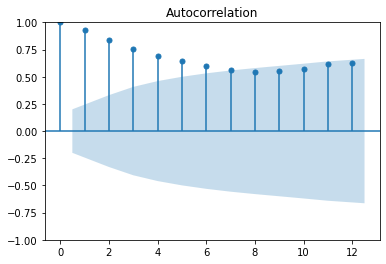

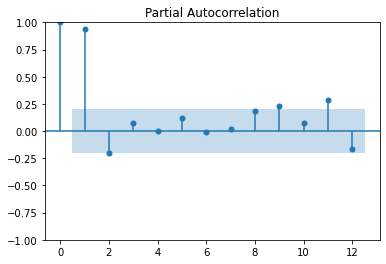

In [15]:
# ACF Plots and PACF Plots

import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_acf(df.Passengers,lags = 12)
tsa_plots.plot_pacf(df.Passengers, lags=12)
plt.show()

In [16]:
# Evaluation Metric RMSE

def RMSE(pred,org):
    temp = (np.sqrt(np.mean((np.array(org)-np.array(pred))**2)))
    return temp

In [17]:
# Simple Exponential Method

ses_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
RMSE(pred_ses, test.Passengers) 

80.54332901444145

In [18]:
# Holt Method

hw_model = Holt(train["Passengers"]).fit(smoothing_level=0.8, smoothing_trend=0.2)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
RMSE(pred_hw,test.Passengers) 

47.87772864030438

In [19]:
# Holts winter exponential smoothing with additive seasonality and additive trend

hwe_model_add_add = ExponentialSmoothing(train['Passengers']).fit(smoothing_level = 0.8, smoothing_trend = 0.2)
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0], end = test.index[-1])
RMSE(pred_hwe_add_add,test.Passengers) 

67.53560168739811

In [20]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend

hwe_model_mul_add = ExponentialSmoothing(train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
RMSE(pred_hwe_mul_add,test.Passengers)

30.906583235206483

In [21]:
# Final Model by combining train and test

hwe_model_mul_add_new = ExponentialSmoothing(df["Passengers"], seasonal = 'mul', trend = 'add', seasonal_periods = 12).fit()

In [22]:
# Forecasting for next 10 period

hwe_model_mul_add_new.forecast(10)

96     312.900533
97     308.172851
98     355.534843
99     345.772161
100    345.698761
101    392.473944
102    436.505077
103    429.863114
104    380.176787
105    332.321235
dtype: float64

##### Conclusion:

- From the above models, the model with the lowest RMSE value is holts winter exponential smoothing with multiplicative seasonality and additive trend. Thus, we use it to forecast the airlines passengers using the same model